In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.activations import elu
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [2]:
from fonction import *

In [5]:
# Definition of the path of the data
data_path = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\train_set\\mesh_square_trans_A\\data_set_3.csv'

In [6]:
# load the data 
data = np.loadtxt(data_path, delimiter=',')
ind = data[:,0]
data= data[:,1:]
data.shape

(116542, 41)

In [7]:
X_train, X_test, Y_train, Y_test, indice_neg_data = data_preparation(data)

In [8]:
# check the size of the training and test set :
print(" the size of X_train is ",np.shape(X_train))
print(" the size of X_test is ",np.shape(X_test))
print(" the size of Y_train is ",np.shape(Y_train))
print(" the size of Y_test is ",np.shape(Y_test))

 the size of X_train is  (93233, 40)
 the size of X_test is  (23309, 40)
 the size of Y_train is  (93233, 1)
 the size of Y_test is  (23309, 1)


In [8]:
def build_model_base_line(summary = True):
    
    #architecture
    model = Sequential()
    model.add(Dense(1 ,input_shape=(40,)))
    if summary :
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

===================NN architecture==========================
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 41        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
=======================training=============================
Epoch 00230: early stopping
MSE Train: 0.648 | MSE Test: 0.644


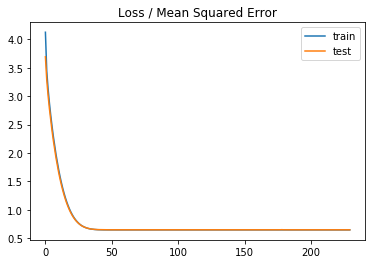

Training time is : 0.35  minute
======================Saving model==========================
Saved model to disk


In [9]:
model_base, train_mse , test_mse = training_NN(build_model_base_line,X_train, X_test, Y_train, Y_test,"model_bl_data_3.h5",batch = 1000)

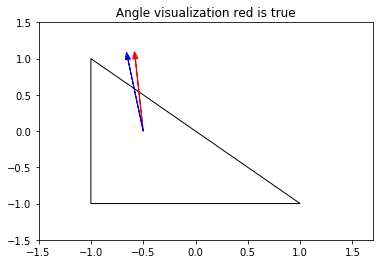

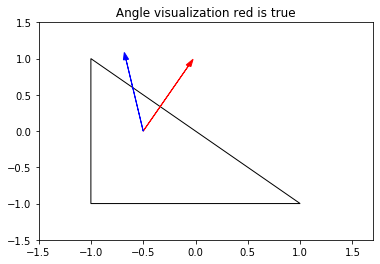

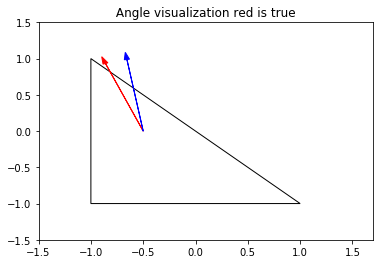

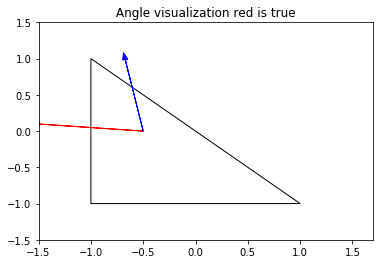

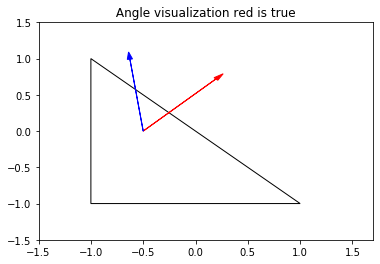

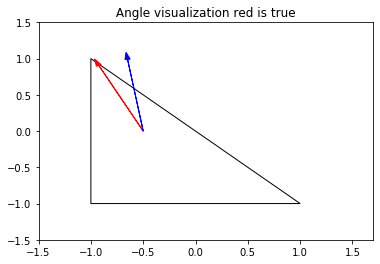

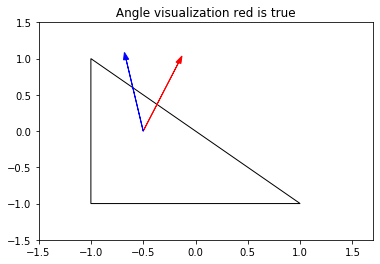

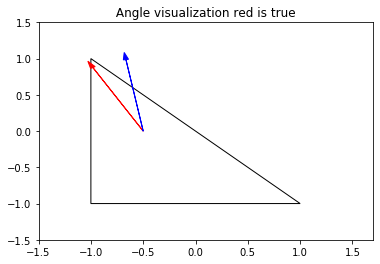

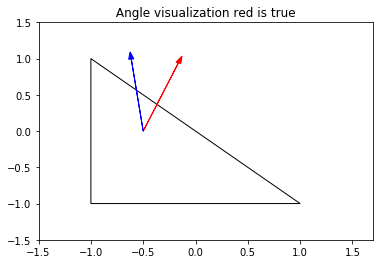

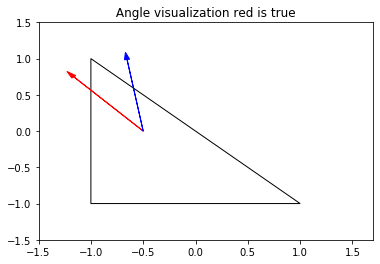

In [10]:
angle_visualization(model_base , X_test , Y_test)

In [9]:
def build_model_3_tanh(summary = True):
    
    #architecture
    model = Sequential()
    model.add(Dense(20 ,input_shape=(40,),activation = 'tanh'))
    model.add(Dense(20,activation = 'tanh'))
    model.add(Dense(20,activation = 'tanh'))
    model.add(Dense(1))
    if summary:
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

===================NN architecture==========================
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________
None
=======================training=============================
Epoch 01090: early stopping
MSE Train: 0.047 | MSE Test: 0.050


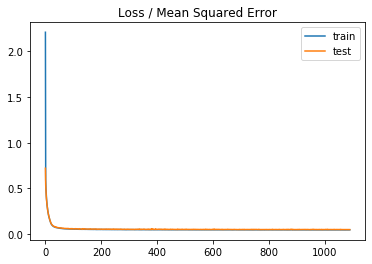

Training time is : 2.05  minute
======================Saving model==========================
Saved model to disk


In [10]:
model_3_tanh, train_mse , test_mse = training_NN(build_model_3_tanh,X_train, X_test, Y_train, Y_test,"model_3_tanh_data_3.h5",batch = 1000)

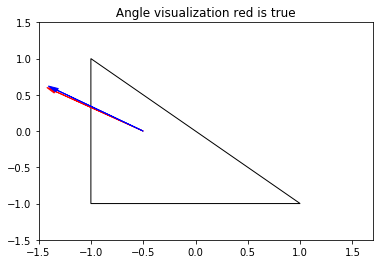

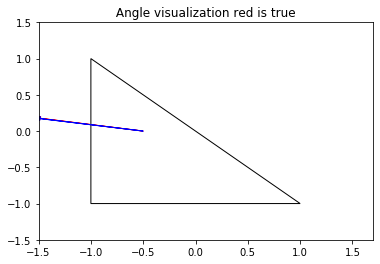

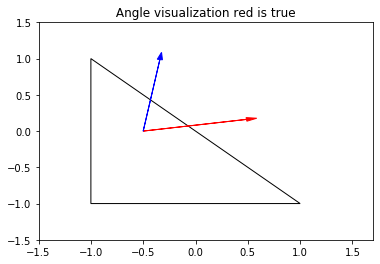

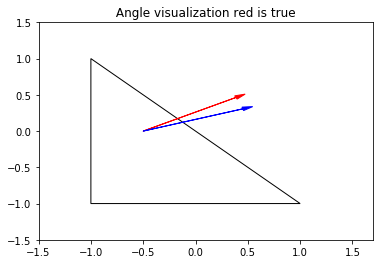

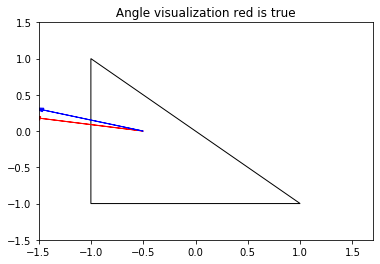

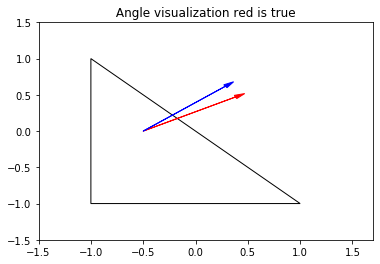

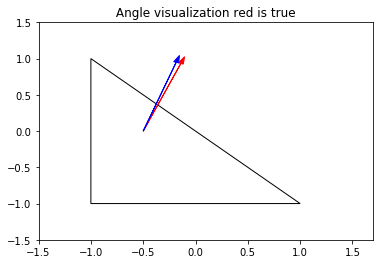

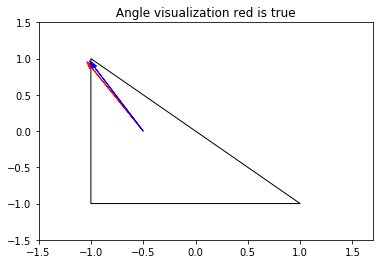

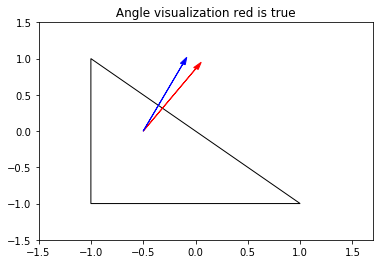

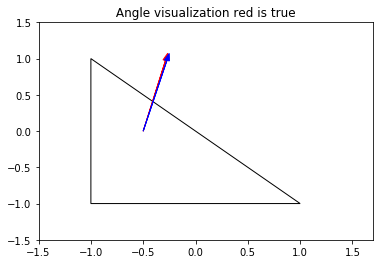

In [11]:
angle_visualization(model_3_tanh , X_test , Y_test)

We can see here that bad prediction such as the 10 , 5 plot correspond to triangle that has the discontinuty in a corner 

### Making prediction :

In [ ]:
#from keras.models import load_model
#model_3_tanh = load_model('model_3_tanh_data_4.h5')

In [33]:
data_path_test_1 = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\test_set\\mesh_square_trans\\data_test_set_3_30.csv'

In [16]:
test_mse_1 = prediction_on_new_grid(data_path_test_1,'\data\pred_data_set_A_3_30.csv',model_3_tanh)

loading data ... 
loading succed
on a new mesh the mse is : 0.0085
saving prediction ...
saving succed


In [17]:
data_path_test_2 = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\test_set\\mesh_square_trans\\data_test_set_3_60.csv'

In [18]:
test_mse_2 = prediction_on_new_grid(data_path_test_2,'\data\pred_data_set_A_3_60.csv',model_3_tanh)

loading data ... 
loading succed
on a new mesh the mse is : 0.0082
saving prediction ...
saving succed


In [20]:
data_path_test_3 = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\test_set\\mesh_square_trans\\data_test_set_3_90.csv'
test_mse_3 = prediction_on_new_grid(data_path_test_3,'\data\pred_data_set_A_3_90.csv',model_3_tanh)

loading data ... 
loading succed
on a new mesh the mse is : 0.0009
saving prediction ...
saving succed


In [21]:
data_path_test_4 = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\test_set\\mesh_square_trans\\data_test_set_3_circle.csv'
test_mse_4 = prediction_on_new_grid(data_path_test_4,'\data\pred_data_set_A_3_circle.csv',model_3_tanh)

loading data ... 
loading succed
on a new mesh the mse is : nan
saving prediction ...
saving succed


C:\Users\pierr\Desktop\Projet de semestre I\NN_pyhton_code\fonction.py:23: RuntimeWarning: invalid value encountered in less
  indice_neg = np.where(data[:,-1]<0)[0]


#### trying to predict with model trained on mesh B

In [23]:
from keras.models import load_model
model_B = load_model('model_3_tanh_data_6.h5')

In [34]:
test_mse_1 = prediction_on_new_grid(data_path_test_1,'\data\pred_data_set_A_3_30_model_B.csv',model_B)

loading data ... 
loading succed
on a new mesh the mse is : 0.1217
saving prediction ...
saving succed


In [25]:
test_mse_2 = prediction_on_new_grid(data_path_test_2,'\data\pred_data_set_A_3_60_model_B.csv',model_B)

loading data ... 
loading succed
on a new mesh the mse is : 0.0006
saving prediction ...
saving succed


In [26]:
test_mse_3 = prediction_on_new_grid(data_path_test_3,'\data\pred_data_set_A_3_90_model_B.csv',model_B)

loading data ... 
loading succed
on a new mesh the mse is : 0.0006
saving prediction ...
saving succed


In [27]:
test_mse_4 = prediction_on_new_grid(data_path_test_4,'\data\pred_data_set_A_3_circle_model_B.csv',model_B)

loading data ... 
loading succed
on a new mesh the mse is : nan
saving prediction ...
saving succed


#### trying to predict with model trained on mesh C

In [28]:
from keras.models import load_model
model_C = load_model('model_3_tanh_data_C_3.h5')

In [29]:
test_mse_1 = prediction_on_new_grid(data_path_test_1,'\data\pred_data_set_A_3_30_model_C.csv',model_C)

loading data ... 
loading succed
on a new mesh the mse is : 0.1087
saving prediction ...
saving succed


In [30]:
test_mse_2 = prediction_on_new_grid(data_path_test_2,'\data\pred_data_set_A_3_60_model_C.csv',model_C)

loading data ... 
loading succed
on a new mesh the mse is : 0.0004
saving prediction ...
saving succed


In [37]:
test_mse_3 = prediction_on_new_grid(data_path_test_3,'\data\pred_data_set_A_3_90_model_C.csv',model_C)

loading data ... 
loading succed
on a new mesh the mse is : 0.0004
saving prediction ...
saving succed


In [38]:
test_mse_4 = prediction_on_new_grid(data_path_test_4,'\data\pred_data_set_A_3_circle_model_C.csv',model_C)

loading data ... 
loading succed
on a new mesh the mse is : nan
saving prediction ...
saving succed
